Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


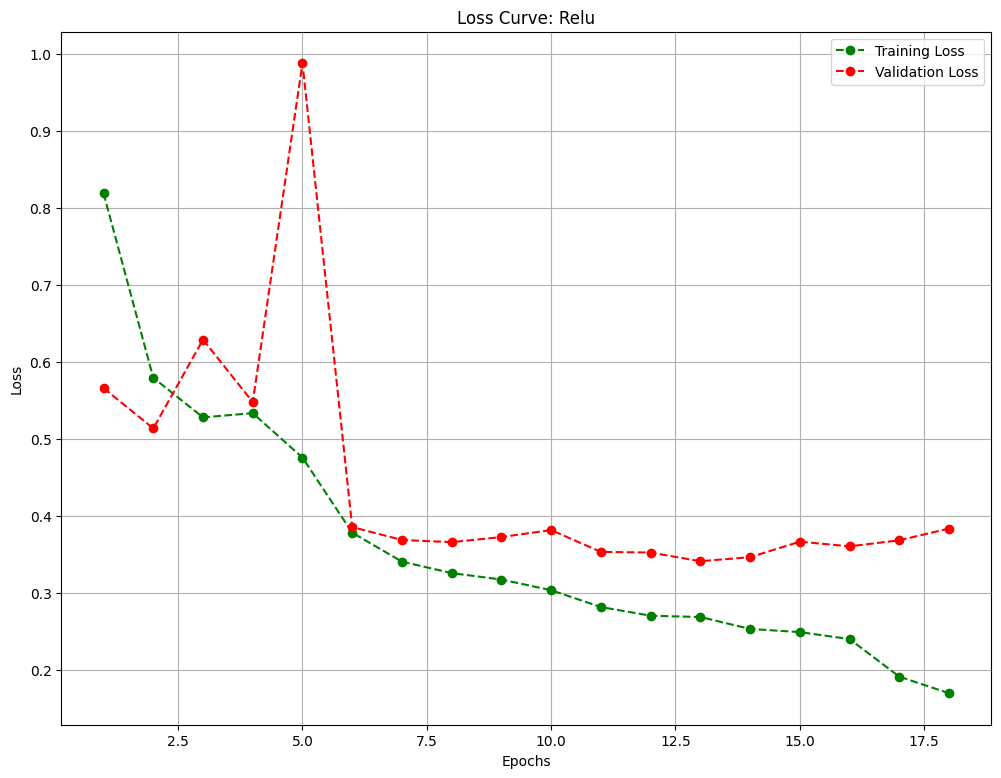

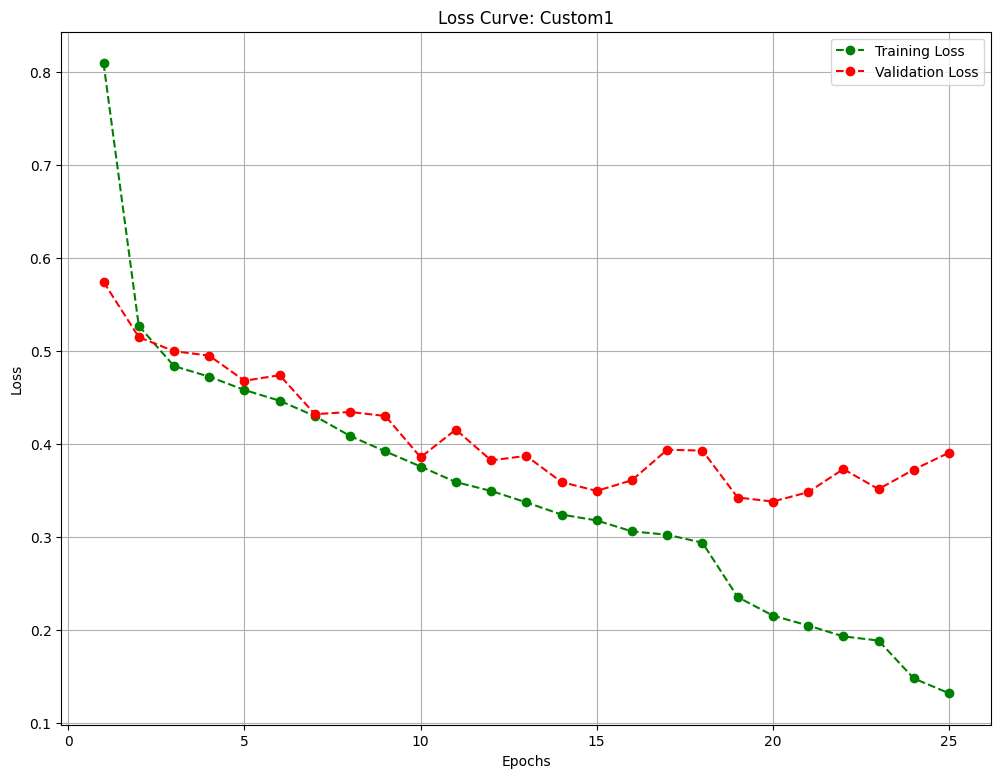

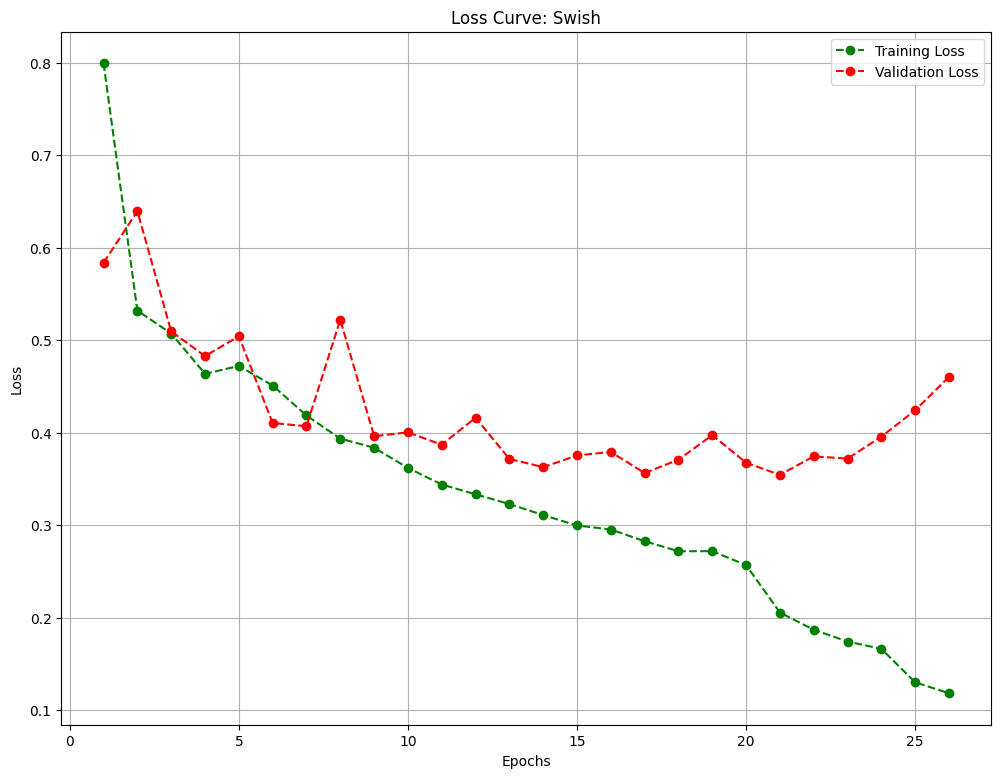

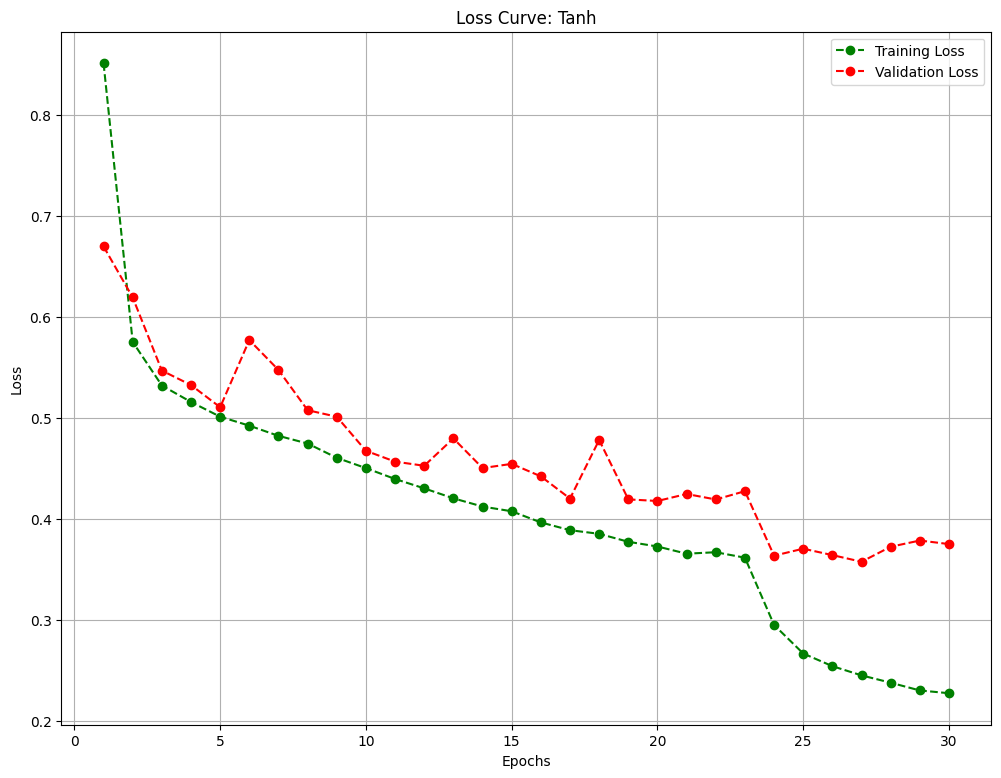

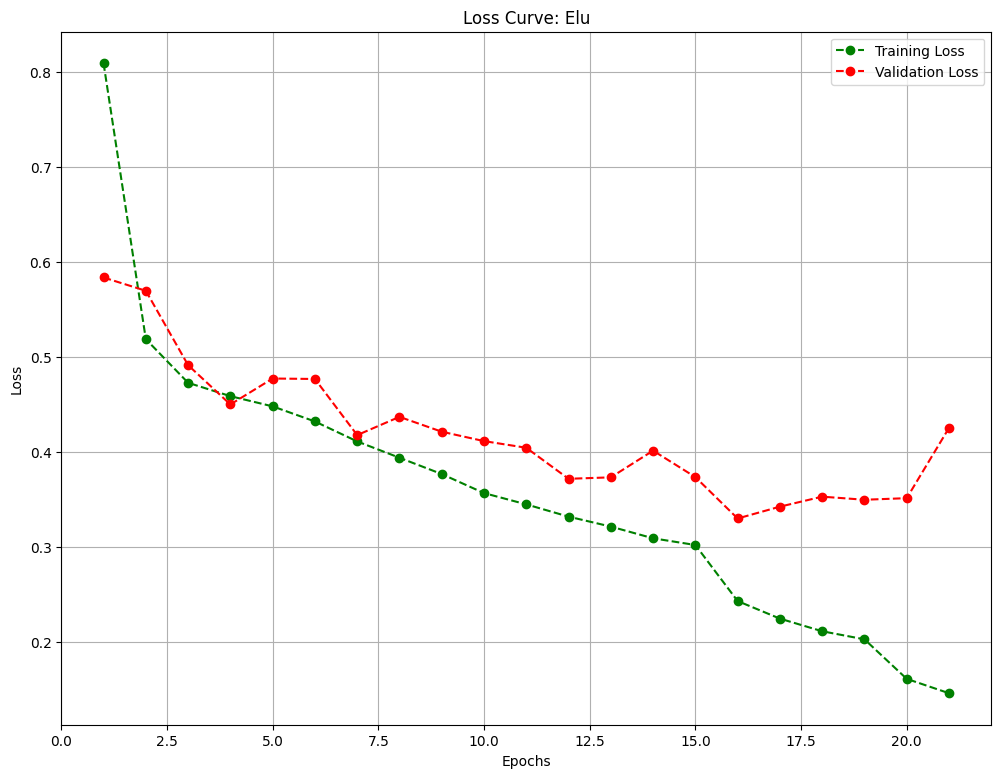

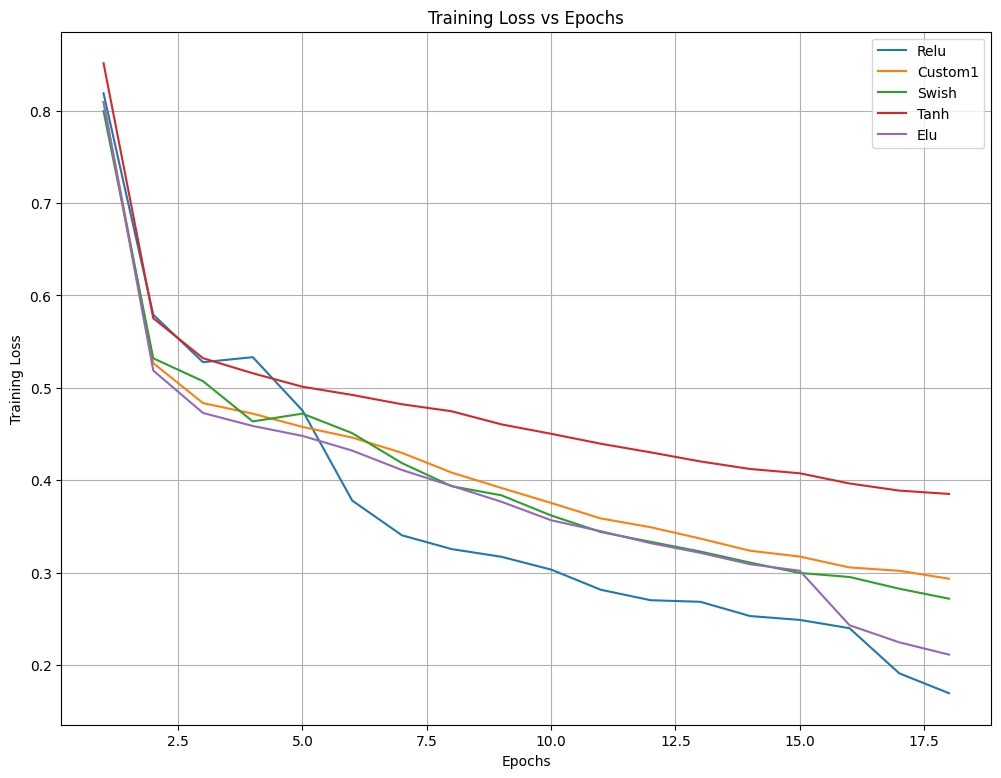

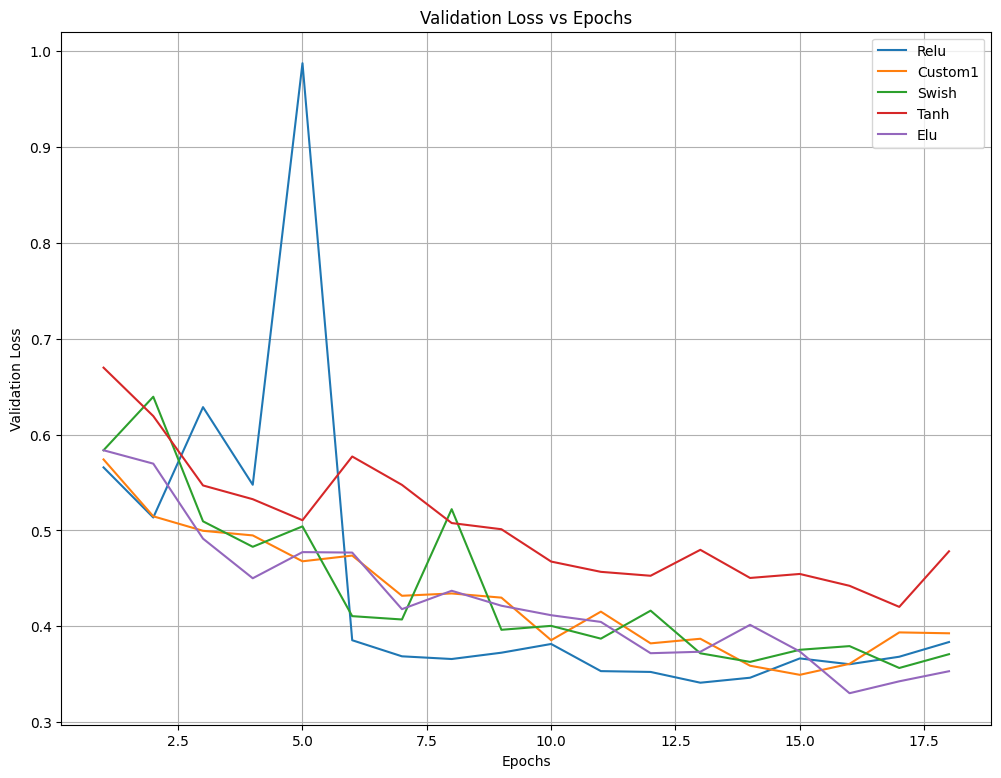

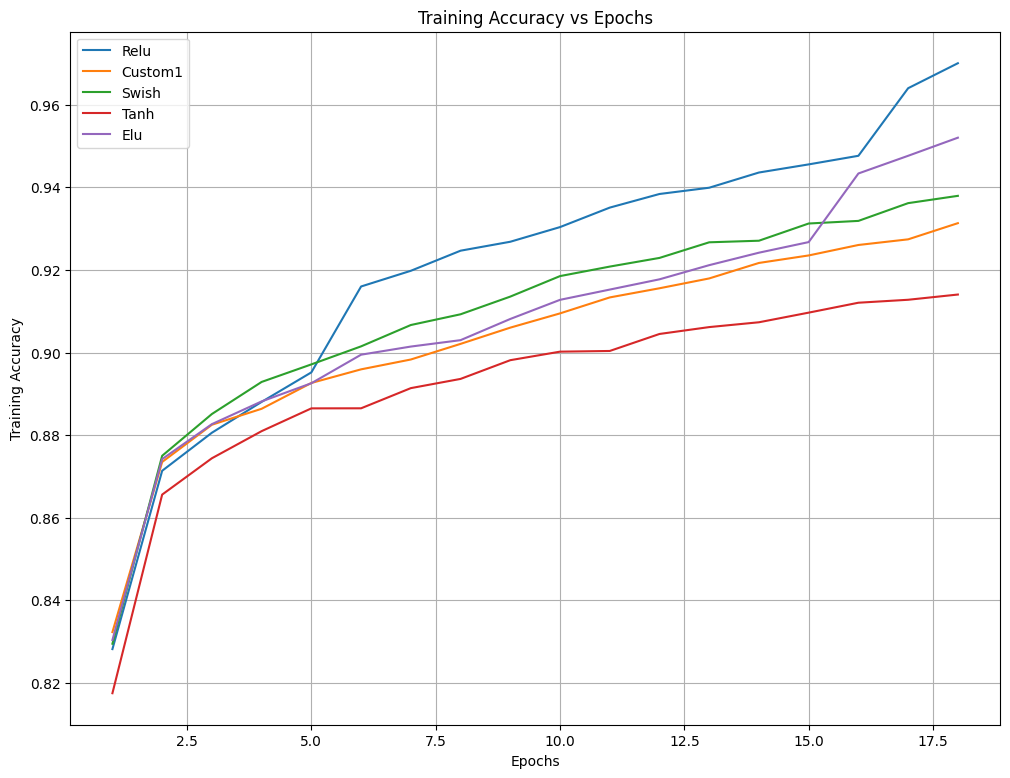

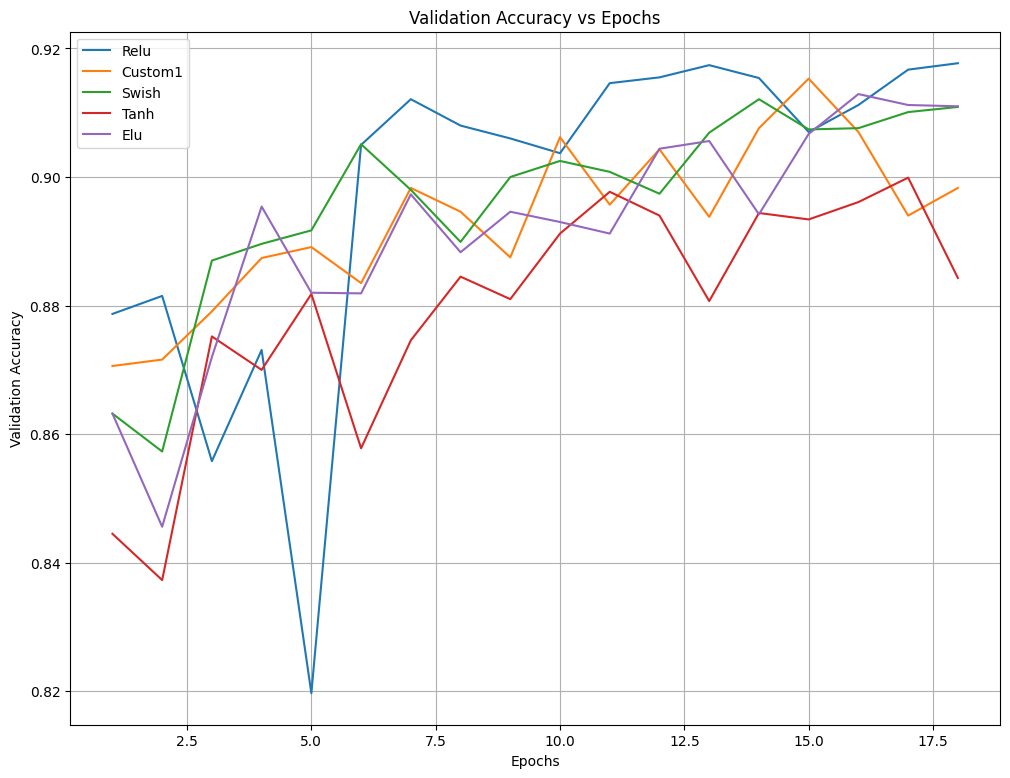


📊 Sorted Performance Metrics:

         Precision  Recall  F1 Score  Test Acc.
Swish        0.922   0.922     0.922      0.922
Relu         0.919   0.917     0.918      0.917
Custom1      0.917   0.917     0.916      0.917
Tanh         0.915   0.914     0.914      0.914
Elu          0.913   0.913     0.912      0.913


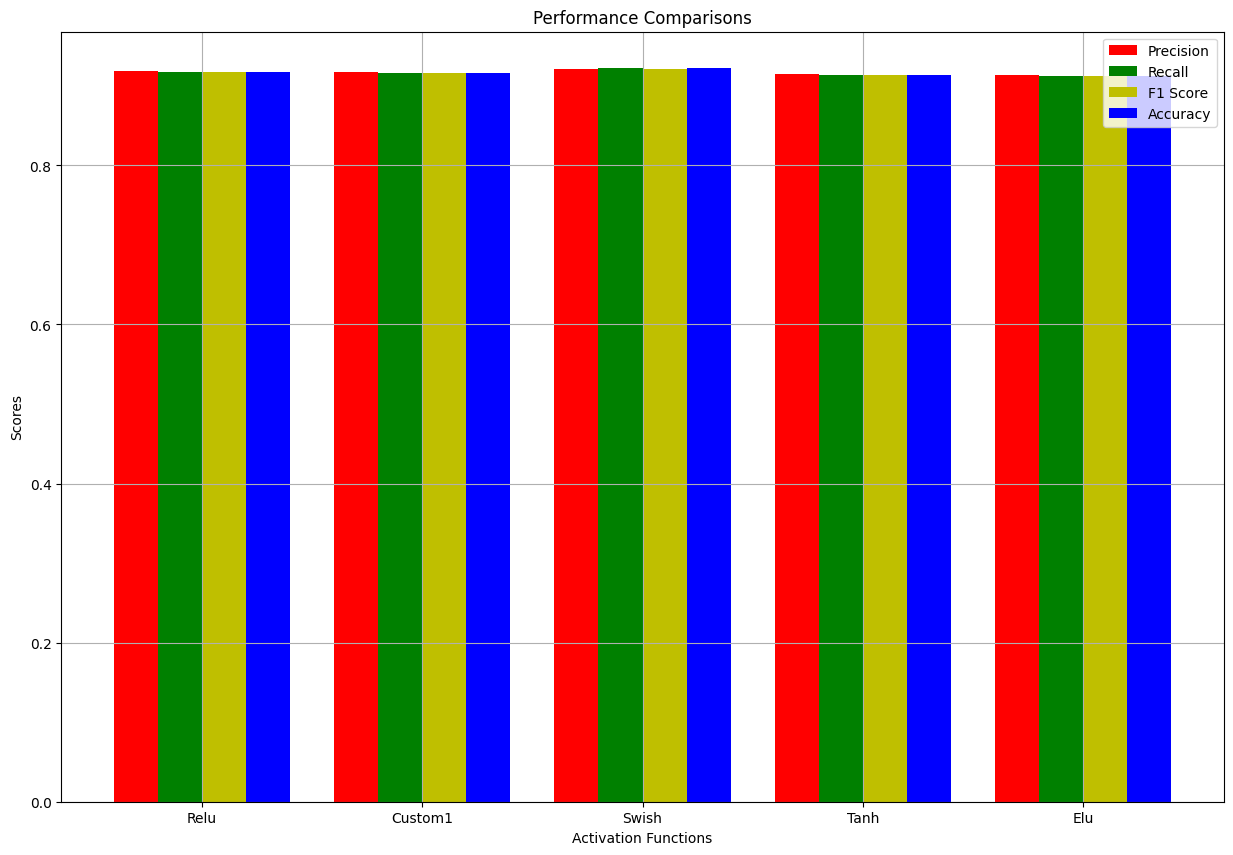

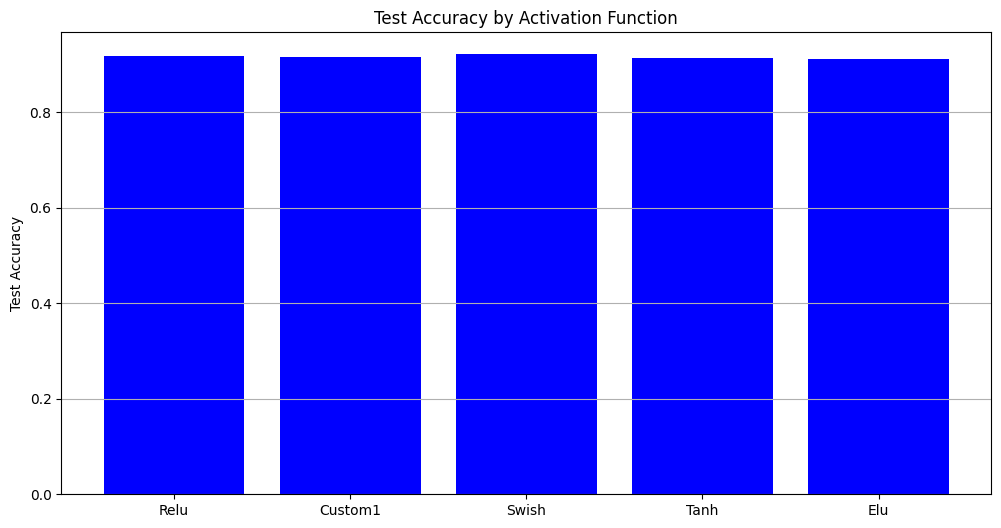

In [2]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json


drive.mount('/content/drive')


paths = {
    "Relu": '/content/drive/My Drive/Colab Notebooks/relu_on_fmnist_performance.json',
    "Custom1": '/content/drive/My Drive/Colab Notebooks/custom1_on_fmnist_performance.json',
    "Swish": '/content/drive/My Drive/Colab Notebooks/swish_on_fmnist_performance.json',
    "Tanh": '/content/drive/My Drive/Colab Notebooks/tanh_on_fmnist_performance.json',
    "Elu": '/content/drive/My Drive/Colab Notebooks/elu_on_fmnist_performance.json',
}
results = {}
for name, path in paths.items():
    with open(path, 'r') as f:
        results[name] = json.load(f)


def plot_loss_curves(name, metrics_dict):
    epochs = range(1, len(metrics_dict['loss_train']) + 1)
    plt.figure(figsize=(12, 9))
    plt.plot(epochs, metrics_dict['loss_train'], "go--", label="Training Loss")
    plt.plot(epochs, metrics_dict['loss_val'], "ro--", label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Loss Curve: {name}")
    plt.legend()
    plt.grid(True)
    plt.show()


for name, data in results.items():
    plot_loss_curves(name, data)

min_epochs = min(len(v['loss_train']) for v in results.values())
plt.figure(figsize=(12, 9))
for name, data in results.items():
    plt.plot(range(1, min_epochs+1), data['loss_train'][:min_epochs], label=name)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 9))
for name, data in results.items():
    plt.plot(range(1, min_epochs+1), data['loss_val'][:min_epochs], label=name)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 9))
for name, data in results.items():
    plt.plot(range(1, min_epochs+1), data['acc_train'][:min_epochs], label=name)
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 9))
for name, data in results.items():
    plt.plot(range(1, min_epochs+1), data['acc_val'][:min_epochs], label=name)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

index = list(results.keys())
columns = {0: "Precision", 1: "Recall", 2: "F1 Score"}

list_of_scores = [results[model]['prf_score'] for model in index]
test_accuracy = pd.Series(
    [results[model]['score'][1] for model in index],
    name="Test Acc.",
)

df1 = pd.concat([pd.DataFrame(list_of_scores).drop(columns=[3]), test_accuracy], axis=1)
df1.columns = ["Precision", "Recall", "F1 Score", "Test Acc."]
df1.index = index
df1_sorted = df1.sort_values(by="Test Acc.", ascending=False)

print("\n📊 Sorted Performance Metrics:\n")
print(round(df1_sorted, 3))

precisions = [score[0] for score in list_of_scores]
recalls = [score[1] for score in list_of_scores]
f1_scores = [score[2] for score in list_of_scores]

width = 0.2
x = np.arange(len(index))
plt.figure(figsize=(15, 10))
plt.bar(x - 1.5 * width, precisions, width=width, color="r", label="Precision")
plt.bar(x - 0.5 * width, recalls, width=width, color="g", label="Recall")
plt.bar(x + 0.5 * width, f1_scores, width=width, color="y", label="F1 Score")
plt.bar(x + 1.5 * width, test_accuracy, width=width, color="b", label="Accuracy")
plt.xticks(ticks=x, labels=index)
plt.xlabel("Activation Functions")
plt.ylabel("Scores")
plt.title("Performance Comparisons")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(index, test_accuracy, color="b")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy by Activation Function")
plt.grid(axis="y")
plt.show()